# Naïve Bayes - Classificação

Como alternativa ao modelo NB foram criados modelos utilizando o algoritmo Random Forest

### Descrição do dataset

In [ ]:
# Sex: male or female;
# Age: Age of the patient;
# Current Smoker: whether or not the patient is a current smoker; 
# Cigs Per Day: the number of cigarettes that the person smoked on average in one day; 
# BP Meds: whether or not the patient was on blood pressure medication; 
# Prevalent Stroke: whether or not the patient had previously had a stroke; 
# Prevalent Hyp: whether or not the patient was hypertensive; 
# Diabetes: whether or not the patient had diabetes; 
# Tot Chol: total cholesterol level; 
# Sys BP: systolic blood pressure; 
# Dia BP: diastolic blood pressure; 
# BMI: Body Mass Index; 
# Heart Rate: heart rate; 
# Glucose: glucose level; 
# 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”).

### Objetivo 
Criar um modelo de classificação para prever a presença de doença coronariana 

In [1]:
# Carregando os módulos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Carregando o dataset
dados = pd.read_csv('framingham.csv')
dados.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
# Verificando o número de observações e variáveis
dados.shape

(4238, 16)

### Pré-processamento

In [4]:
# Verificando a presença de dados missing
dados.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
# Eliminando os dados missing
dados.dropna(inplace=True)

In [6]:
# Verificando a distribuição das classes (valores absolutos)
dados['TenYearCHD'].value_counts()

0    3099
1     557
Name: TenYearCHD, dtype: int64

In [7]:
# Verificando a distribuição das classes (percentuais)
dados['TenYearCHD'].value_counts(normalize=True)

0    0.847648
1    0.152352
Name: TenYearCHD, dtype: float64

In [8]:
# Criando o conjunto de dados preditores
dados_var = dados.iloc[:,0:15]
dados_var.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [9]:
# Criando o conjunto de dados de saída (alvo)
dados_alvo = dados.iloc[:,15]
dados_alvo.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

### Criando os conjuntos de treinamento e teste

In [10]:
from sklearn.model_selection import train_test_split 
treino1, teste1, treino1_classes, teste1_classes = train_test_split(dados_var, 
                                                              dados_alvo,
                                                              stratify = dados_alvo,
                                                              test_size=0.3, random_state=123) 

In [11]:
# Verificando os tamanhos dos conjuntos de treino e teste
print(treino1.shape)
print(teste1.shape)

(2559, 15)
(1097, 15)


In [12]:
# Verificando o distribuição das classes para treino e teste
print(treino1_classes.value_counts(normalize=True))
print(teste1_classes.value_counts(normalize=True))

0    0.847597
1    0.152403
Name: TenYearCHD, dtype: float64
0    0.847767
1    0.152233
Name: TenYearCHD, dtype: float64


### Criando o modelo de classificação - Naive Bayes Gaussiano

In [13]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB() 
gnb.fit(treino1, treino1_classes) 

GaussianNB(priors=None, var_smoothing=1e-09)

In [14]:
# Executando as previsões para o conjunto de treino
previsoes_treino1 = gnb.predict(treino1)
previsoes_treino1_probs = gnb.predict_proba(treino1)[:, 1]

In [15]:
# Carregando o pacote para avaliação do AUC e curva ROC
from sklearn.metrics import roc_auc_score, roc_curve
print(roc_auc_score(treino1_classes, previsoes_treino1_probs))

0.726639358797035


In [16]:
from sklearn import metrics 
metrics.accuracy_score(treino1_classes, previsoes_treino1)*100

82.45408362641658

In [17]:
# Previsões para o conjunto de teste
previsoes_teste1 = gnb.predict(teste1)
previsoes_teste1_probs = gnb.predict_proba(teste1)[:, 1]

In [18]:
# Análise da ROC_AUC e Acurácia
print('ROC_AUC: ', roc_auc_score(teste1_classes, previsoes_teste1_probs))
print('Acurácia: ', metrics.accuracy_score(teste1_classes, previsoes_teste1)*100)

ROC_AUC:  0.70574013263795
Acurácia:  80.67456700091158


In [19]:
# Carregando os pacotes para avaliação da matriz de confusão
from sklearn.metrics import confusion_matrix
confusion_matrix(previsoes_teste1, teste1_classes)

array([[844, 126],
       [ 86,  41]], dtype=int64)

In [20]:
# Precisão, Recall e F1-Score
from sklearn.metrics import classification_report
nome_classes=dados_alvo.unique()
print(classification_report(teste1_classes, previsoes_teste1, labels=nome_classes))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       930
           1       0.32      0.25      0.28       167

    accuracy                           0.81      1097
   macro avg       0.60      0.58      0.58      1097
weighted avg       0.79      0.81      0.80      1097



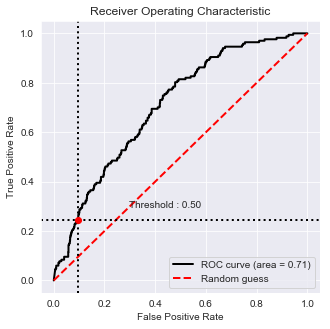

In [22]:
# Visualizando a curva ROC (Receiver Operating Characteristic)
%matplotlib inline
from plot_metric.functions import BinaryClassification
bc = BinaryClassification(teste1_classes, previsoes_teste1_probs, labels=[0,1])
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

### Alterando as amostras da classe menor (Up-sample)

In [23]:
# Separando os dados por tamanho da classe
dados_maior = dados[dados['TenYearCHD']==0]
dados_menor = dados[dados['TenYearCHD']==1]

In [24]:
# Criando amostras (randômicas) baseadas na classe de menor tamanho
from sklearn.utils import resample
dados_menor_up = resample(dados_menor, 
                          replace=True,     
                          n_samples=2500,    
                          random_state=123) 

In [25]:
# Combinando (concatenando) as classes de maior tamanho com os novos dados gerados
dados_up = pd.concat([dados_maior, dados_menor_up])

In [26]:
# Verificando a distribuição das classes
dados_up['TenYearCHD'].value_counts()

0    3099
1    2500
Name: TenYearCHD, dtype: int64

#### Criando um novo modelo - versão 2

In [28]:
dados_up_var = dados_up.iloc[:,0:15]
dados_up_alvo = dados_up.iloc[:,15]

treino2, teste2, treino2_classes, teste2_classes = train_test_split(dados_up_var, 
                                                              dados_up_alvo,
                                                              stratify = dados_up_alvo,
                                                              test_size=0.3, random_state=123)
gnb2 = GaussianNB() 
gnb2.fit(treino2, treino2_classes)

previsoes_teste2 = gnb2.predict(teste2)
previsoes_teste2_probs = gnb2.predict_proba(teste2)[:, 1]

confusion_matrix(previsoes_teste2, teste2_classes)

array([[807, 509],
       [123, 241]], dtype=int64)

In [29]:
nome_classes=dados_up_alvo.unique()
print(classification_report(teste2_classes, previsoes_teste2, labels=nome_classes))

              precision    recall  f1-score   support

           0       0.61      0.87      0.72       930
           1       0.66      0.32      0.43       750

    accuracy                           0.62      1680
   macro avg       0.64      0.59      0.58      1680
weighted avg       0.64      0.62      0.59      1680



### Alterando as amostras da classe maior (Down-sample)

In [30]:
# Separando os dados por tamanho da classe
dados_maior = dados[dados['TenYearCHD']==0]
dados_menor = dados[dados['TenYearCHD']==1]

In [31]:
# Removendo amostras (randômicas) baseadas na classe de maior tamanho
dados_maior_down = resample(dados_maior, 
                          replace=False,     
                          n_samples=600,    
                          random_state=123) 

In [32]:
# Combinando (concatenando) as classes de menor tamanho com os novos dados 
dados_down = pd.concat([dados_maior_down, dados_menor])

In [33]:
# Verificando a distribuição das classes
dados_down['TenYearCHD'].value_counts()

0    600
1    557
Name: TenYearCHD, dtype: int64

#### Criando um novo modelo - versão 3

In [34]:
dados_down_var = dados_down.iloc[:,0:15]
dados_down_alvo = dados_down.iloc[:,15]

treino3, teste3, treino3_classes, teste3_classes = train_test_split(dados_down_var, 
                                                              dados_down_alvo,
                                                              stratify = dados_down_alvo,
                                                              test_size=0.3, random_state=123)
gnb3 = GaussianNB() 
gnb3.fit(treino3, treino3_classes)

previsoes_teste3 = gnb3.predict(teste3)
previsoes_teste3_probs = gnb3.predict_proba(teste3)[:, 1]

confusion_matrix(previsoes_teste3, teste3_classes)

array([[163, 120],
       [ 17,  48]], dtype=int64)

In [35]:
nome_classes=dados_down_alvo.unique()
print(classification_report(teste3_classes, previsoes_teste3, labels=nome_classes))

              precision    recall  f1-score   support

           0       0.58      0.91      0.70       180
           1       0.74      0.29      0.41       168

    accuracy                           0.61       348
   macro avg       0.66      0.60      0.56       348
weighted avg       0.65      0.61      0.56       348



### Tentativas de melhoria de performance

In [36]:
# Extração de características - determinando as variáveis mais relevantes 
from sklearn.ensemble import ExtraTreesClassifier
modelo = ExtraTreesClassifier(n_estimators = 1000, random_state = 123)
modelo.fit(treino2, treino2_classes) # Usando os conjuntos do melhor modelo
print(modelo.feature_importances_)
print(treino2.columns)

[0.02904125 0.14719731 0.05768606 0.0207785  0.05244249 0.00765531
 0.00347366 0.04951615 0.01169151 0.10305908 0.11566396 0.10401255
 0.10135516 0.09613196 0.10029504]
Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')


In [37]:
# Eliminando as variáveis menos relevantes
treino4 = treino2.drop(columns=['male', 'education', 'currentSmoker', 'cigsPerDay',
                               'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes'])

In [38]:
treino4.head()

,age,totChol,sysBP,diaBP,BMI,heartRate,glucose
520,59,271.0,117.5,65.0,19.77,70.0,89.0
919,42,194.0,111.0,67.5,21.34,73.0,47.0
3225,50,236.0,152.0,92.0,24.47,120.0,67.0
3731,60,220.0,167.5,110.0,30.41,90.0,84.0
4119,51,195.0,122.0,72.0,21.51,82.0,64.0


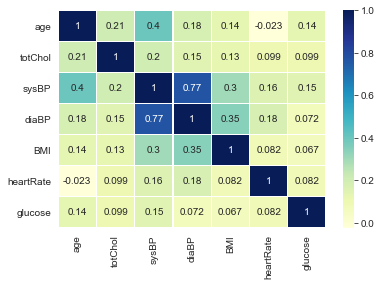

In [39]:
# Avaliando as correlações 
sns.heatmap(treino4.corr(), cmap ="YlGnBu", linewidths = 0.1, annot=True) 

In [40]:
# Eliminando variáveis fortemente correlacionadas
treino4 = treino4.drop(columns=['diaBP'])

In [41]:
treino4.describe()

,age,totChol,sysBP,BMI,heartRate,glucose
count,3919.000000,3919.000000,3919.000000,3919.000000,3919.000000,3919.000000
mean,51.165093,239.284767,135.879561,26.041000,75.966318,84.333248
std,8.740461,45.777103,24.384109,4.273407,12.206195,31.970151
min,32.000000,113.000000,83.500000,15.540000,44.000000,40.000000
25%,44.000000,208.000000,119.000000,23.140000,67.000000,72.000000
50%,51.000000,237.000000,131.500000,25.650000,75.000000,78.000000
75%,59.000000,266.000000,148.000000,28.420000,83.000000,87.500000
max,69.000000,600.000000,295.000000,51.280000,143.000000,394.000000


#### Criando um novo modelo - versão 4

In [42]:
treino4_classes = treino2_classes
teste4_classes = teste2_classes
gnb4 = GaussianNB() 
gnb4.fit(treino4, treino4_classes) 

GaussianNB(priors=None, var_smoothing=1e-09)

In [43]:
# Eliminando as variáveis menos relevantes do conjunto de teste
teste4 = teste2.drop(columns=['male', 'education', 'currentSmoker', 'cigsPerDay',
                               'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes',
                            'diaBP'])

In [44]:
teste4.head()

,age,totChol,sysBP,BMI,heartRate,glucose
771,63,210.0,148.0,24.01,76.0,88.0
928,58,243.0,106.0,23.72,60.0,80.0
2665,58,175.0,83.5,29.66,95.0,115.0
3254,51,342.0,110.0,28.86,72.0,87.0
3121,38,267.0,179.5,20.44,76.0,67.0


In [45]:
# Executando as previsões
previsoes_teste4 = gnb4.predict(teste4)
previsoes_teste4_probs = gnb4.predict_proba(teste4)[:, 1]

In [46]:
print('ROC_AUC: ',roc_auc_score(teste4_classes, previsoes_teste4_probs))
print('Acurácia: ', metrics.accuracy_score(teste4_classes, previsoes_teste4)*100)

ROC_AUC:  0.7014831541218638
Acurácia:  63.27380952380952


In [ ]:
# Matriz de confusão
confusion_matrix(previsoes_teste4, teste4_classes)

In [47]:
# Avaliação do modelo
print(classification_report(teste4_classes, previsoes_teste4, labels=nome_classes))

              precision    recall  f1-score   support

           0       0.63      0.83      0.72       930
           1       0.65      0.38      0.48       750

    accuracy                           0.63      1680
   macro avg       0.64      0.61      0.60      1680
weighted avg       0.64      0.63      0.61      1680



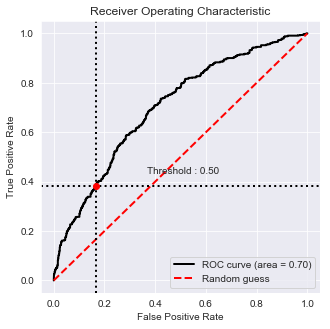

In [48]:
# Curva ROC
from plot_metric.functions import BinaryClassification
bc = BinaryClassification(teste4_classes, previsoes_teste4_probs, labels=[0,1])
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

### Usando o algoritmo Random Forest -  v1

In [49]:
# Carregando o pacote do classificador Random Forest
from sklearn.ensemble import RandomForestClassifier

# Criando o modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, 
                               random_state=123, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

# Treinando o modelo
rf.fit(treino1, treino1_classes)

# Executando as previsões (probabilidade)
teste_probs_rf = rf.predict_proba(teste1)[:, 1]
previsoes_teste_rf = rf.predict(teste1)

# Matriz de confusão
confusion_matrix(previsoes_teste_rf, teste1_classes)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


array([[916, 153],
       [ 14,  14]], dtype=int64)

In [50]:
# Precisão, Recall e F1-Score
print(classification_report(teste1_classes, previsoes_teste_rf, labels=nome_classes))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       930
           1       0.50      0.08      0.14       167

    accuracy                           0.85      1097
   macro avg       0.68      0.53      0.53      1097
weighted avg       0.80      0.85      0.80      1097



### Usando o algoritmo Random Forest -  v2

In [51]:
# Carregando o pacote do classificador Random Forest
from sklearn.ensemble import RandomForestClassifier

# Criando o modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, 
                               random_state=123, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

# Treinando o modelo
rf.fit(treino2, treino2_classes)

# Executando as previsões 
teste_probs_rf = rf.predict_proba(teste2)[:, 1]
previsoes_teste_rf = rf.predict(teste2)

# Matriz de confusão
confusion_matrix(previsoes_teste_rf, teste2_classes)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


array([[885,  25],
       [ 45, 725]], dtype=int64)

In [52]:
# Precisão, Recall e F1-Score
print(classification_report(teste2_classes, previsoes_teste_rf, labels=nome_classes))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       930
           1       0.94      0.97      0.95       750

    accuracy                           0.96      1680
   macro avg       0.96      0.96      0.96      1680
weighted avg       0.96      0.96      0.96      1680



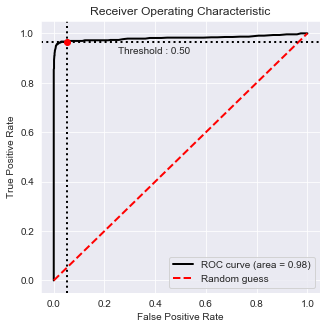

In [53]:
# Curva ROC
from plot_metric.functions import BinaryClassification
bc = BinaryClassification(teste2_classes, teste_probs_rf, labels=[0,1])
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()